# SyriaTel Churn Modelling

## Project overview
Customer retention is a key priority for any business seeking long-term success — and this is even more critical in a highly competitive industry such as telecommunications. This project is centred on that challenge. Specifically, it aims to build a predictive model to identify SyriaTel customers who are at risk of churning — that is, discontinuing their relationship with the company.

By leveraging customer-level data, the goal is to develop a binary classification model that can flag at-risk users, enabling the business to take timely and targeted action. This project applies a range of data science techniques to generate meaningful, actionable insights that support SyriaTel’s strategic priorities.

## Business Understanding
SyriaTel is a leading telecommunications provider based in Syria. Like many companies in the telecoms space, SyriaTel operates in a market where pricing is relatively uniform across providers, making customer loyalty and retention critical competitive advantages. As acquiring new customers is often more expensive than retaining existing ones, the business is right to prioritise churn prevention.

While methods such as personalised offers, loyalty programmes, and service improvements are useful, they are only effective if directed at the right customers at the right time. Identifying patterns that signal a high risk of churn would allow SyriaTel to act proactively. This makes churn prediction a crucial business tool for maintaining market share and revenue stability.

## Problem statement
SyriaTel is experiencing customer churn — a proportion of users who stop using its services over time. While some churn is expected, high rates can significantly hurt profitability and brand loyalty. Currently, the company lacks a system to predict which customers are most likely to churn, and why.

The objective of this project is to build a machine learning classifier that predicts churn using customer demographic, account, and usage data. The output of this model will be used by business teams to target at-risk customers with timely retention strategies. Success will be measured not just by accuracy, but through business and model appropriate classification metrics.






## Import dataset

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np

In [2]:
# read customer data from csv into a dataframe and preview it
df = pd.read_csv('telecom_churn.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## Exploratory Data Analysis (EDA)

In [3]:
# overview data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Here we can see that there are 3333 records, and the dataset has no null values.

**Column descriptions**

- state: The state of the customer.  
- account length: The length of the account in days or months.  
- area code: The area code of the customer's phone number.  
- phone number: The phone number of the customer.  
- international plan: Whether the customer has an international plan or not.  
- voice mail plan: Whether the customer has a voicemail plan or not.  
- number vmail messages: The number of voicemail messages the customer has.  
- total day minutes: Total minutes of day calls.  
- total day calls: Total number of day calls.  
- total day charge: Total charge for the day calls.  
- total eve minutes: Total minutes of evening calls.  
- total eve calls: Total number of evening calls.  
- total eve charge: Total charge for the evening calls.  
- total night minutes: Total minutes of night calls.
- total night calls: Total number of night calls.
- total night charge: Total charge for the night calls.
- total intl minutes: Total minutes of international calls.
- total intl calls: Total number of international calls.
- total intl charge: Total charge for the international calls.
- customer service calls: Number of times the customer called customer service.
- churn: Whether the customer churned or not (True/False).

In [4]:
# summarise dataframe
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
# import relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Churn/Target Variable

In [6]:
# first want to check churn value counts as that is the target variable
df['churn'].value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

<AxesSubplot:title={'center':'Churn counts'}>

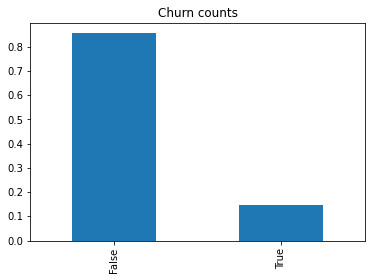

In [7]:
# plot the data
df['churn'].value_counts(normalize = True).plot(kind = 'bar', title = 'Churn counts')

**Class imbalance**  
Distribution of churn is imbalanced. Over 85% of customers didn't churn. This will be a key factor considered when modelling.

### Independent variables

In [8]:
# Seperate the categorical and numerical columns for further 
cat_cols = df[['state', 'churn', 'area code', 'phone number', 'international plan', 'voice mail plan']]
num_cols = []
for cols in df.columns:
    if cols not in cat_cols:
        num_cols.append(cols)
    else:
        continue
        
num_cols

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

#### Distribution of  numerical columns

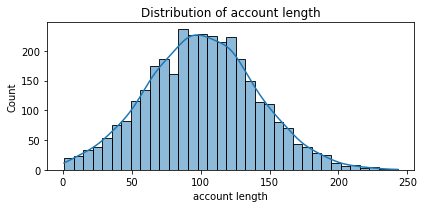

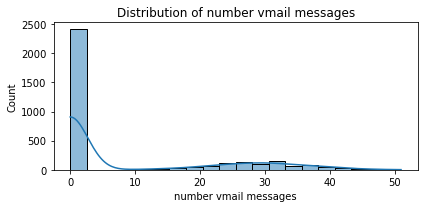

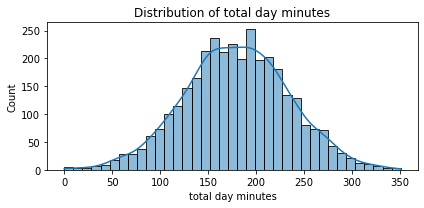

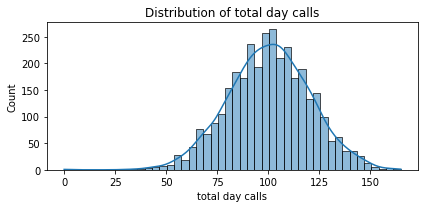

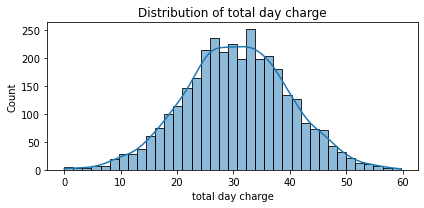

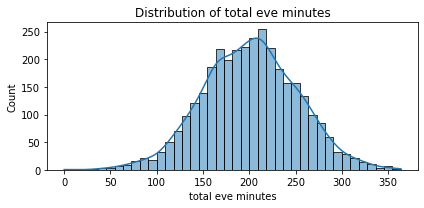

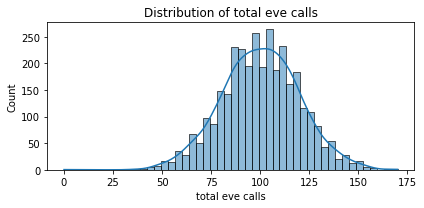

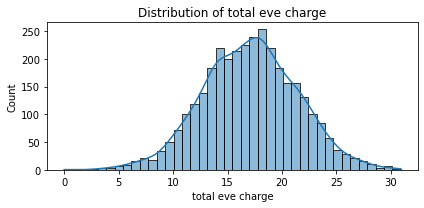

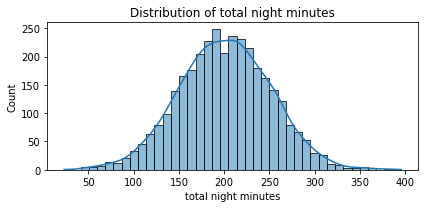

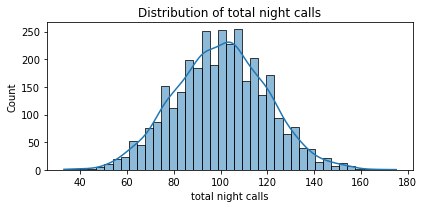

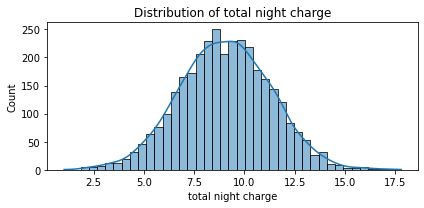

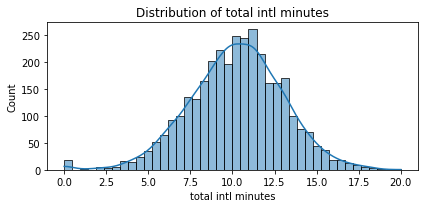

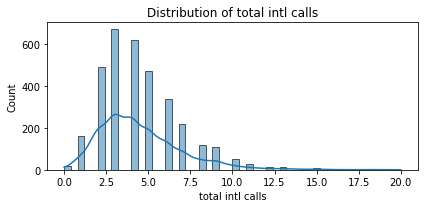

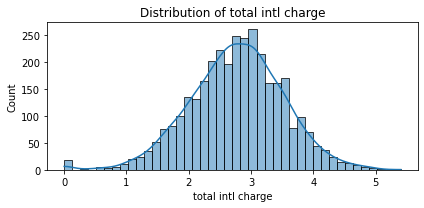

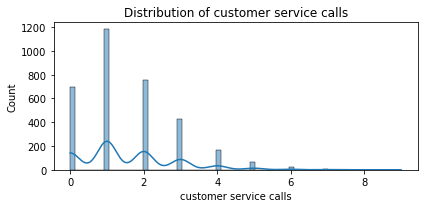

In [9]:
# plot the distribution of the numerical columns
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

The different columns are normally distributed except:
- 'customer service calls'
- 'total intl calls'
- 'number vmail messages'

This could be something to consider during modelling.

#### Correlation

In [10]:
# see the correlation between churn and numerical columns
df[num_cols + ['churn']].corr()['churn'].sort_values(ascending=False)

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

None of the variables have shown a particularly strong correlation to churn. However, it has shown there is strong correlation between different variables i.e. total day minutes and total day charge. This is something to take note of for modelling.

#### Churn rate for categorical columns

In [11]:
# calculate the churn rate for categorical columns
for col in cat_cols:
    churn_rate = df.groupby(col)['churn'].mean().sort_values(ascending=False)
    print(f'\nChurn Rate by {col}:\n{churn_rate}')


Churn Rate by state:
state
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
ND    0.096774
NM    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: churn, dtype: float64

Churn Rate by churn:
churn
True      True
False    False
Name: churn, dtype: bool

Churn Rate by area code:
area code
510    0.148810
408    0.145585
415    0.142598
Name: churn,

`'international plan'` and `'voice mail plan'` played a factor

## Data preprocessing

### Drop unnecessary columns
This includes the 'charge' columns as they are almost perfectly correlated with the correponding minutes columns. Furthermore, we will be dropping the `phone number` column as it is a unique identifier that won't support with modelling. Additionally, the `state` column will be dropped as the sheer number of states makes it impractical to create dummy variables for, and the locational aspect can be viewed on a less granular scale using `area code`.

In [12]:
# drop unnecessary columns and preview dataframe
model_df = df.drop(columns = ['total day charge', 'total eve charge', 'total intl charge', 'total night charge',
                        'phone number', 'state'])
model_df

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,no,yes,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False
3329,68,415,no,no,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False
3330,28,510,no,no,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False
3331,184,510,yes,no,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False


In [13]:
# Convert churn to binary int variable
model_df['churn'] = model_df['churn'].astype(int)
model_df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

### Train test split
The dataset is split into training and testing sets to evaluate the model's performance on unseen data and ensure generalisation.

In [14]:
# import train_test_split
from sklearn.model_selection import train_test_split

# set independent and target variables
X = model_df.drop(['churn'], axis=1)
y = model_df['churn']

# set up train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# display the shape of the training and testing sets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (2333, 14)
Shape of y_train: (2333,)
Shape of X_test: (1000, 14)
Shape of y_test: (1000,)


### One hot encode columns
We will one hot encode the catgeorical columns: `area code`, `international plan` and `voice mail plan`. This is to convert categorical variables into a numerical format suitable for machine learning algorithms. The encoded dataframes that result from this process will be used on models like decision trees which require categorical columns to be encoded numerically to allow feature values to be compared.

In [15]:
# define categorical and numerical columns, to one hot encode categorical columns
model_cat_cols = ['area code', 'international plan', 'voice mail plan']
model_num_cols = []

for cols in model_df.columns:
    if cols == 'churn':
        continue
    elif cols not in model_cat_cols:
        model_num_cols.append(cols)
    else:
        continue
        
model_num_cols

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total eve minutes',
 'total eve calls',
 'total night minutes',
 'total night calls',
 'total intl minutes',
 'total intl calls',
 'customer service calls']

In [16]:
# import OneHotEncoder and initialise it
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse=False)

In [17]:
# fit to train data
ohe.fit(X_train[model_cat_cols])

# transform train and test data
X_train_ohe = ohe.transform(X_train[model_cat_cols])
X_test_ohe = ohe.transform(X_test[model_cat_cols])

# convert from array to dataframe
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns = ohe.get_feature_names(model_cat_cols), index=X_train.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns = ohe.get_feature_names(model_cat_cols), index=X_test.index)

# drop untransformed columns and replace with transformed columns
X_train_encoded = pd.concat([X_train.drop(model_cat_cols, axis=1), X_train_ohe_df], axis=1)
X_test_encoded = pd.concat([X_test.drop(model_cat_cols, axis=1), X_test_ohe_df], axis=1)

### Scaling
Feature scaling is performed to ensure that all numerical variables contributed equally to the model's performance. The scaled (and encoded) dataframe resulting from this will be used on models like logistic regression, which is a linear model, making it sensitive to the scale of the various feature values.

In [18]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# scale features
scaler = StandardScaler()

In [19]:
# create dataframe to be scaled
X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

# fit to train data
scaler.fit(X_train_encoded[model_num_cols])

# transform train and test data
X_train_scaled[model_num_cols] = scaler.transform(X_train_scaled[model_num_cols])
X_test_scaled[model_num_cols] = scaler.transform(X_test_scaled[model_num_cols])

## Modelling

### Classification function
The business context suggests that the priority is to not miss out on any customers that are likely to churn, even if that means occasional false alarms. This means **recall** will be a primary classification metric used to compare models. However, **precision** will also be important to ensure that retention efforts are not wasted on customers unlikely to leave.

From a data context perspective, the classes are very imbalanced, so accuracy will not be favoured highly when evaluating model performance. It will, however, remain a useful metric for checking for **overfitting or underfitting** when compared across the train and test datasets.

Instead, the **AUC (Area Under the ROC Curve) score** will serve as a key evaluation metric. AUC reflects a model’s ability to rank churners higher than non-churners across all thresholds, making it particularly valuable in imbalanced classification tasks. 

In [20]:
# import classification_report and roc_auc_score
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_model(model, X_train, X_test, y_train, y_test):

    # make predictions
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # probabilities for AUC
    y_scores = model.predict_proba(X_test)[:, 1]

    # classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # AUC score
    auc_score = roc_auc_score(y_test, y_scores)
    print(f"AUC Score: {auc_score}")
    
    # overfitting check
    print('\ntrain accuracy: ', model.score(X_train, y_train))
    print('test accuracy: ', model.score(X_test, y_test))

### Baseline model - Logistic Regression

In [21]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

# initialise and fit model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [22]:
# evaluate the model
evaluate_model(logreg, X_train_scaled, X_test_scaled, y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       857
           1       0.57      0.22      0.32       143

    accuracy                           0.86      1000
   macro avg       0.73      0.60      0.62      1000
weighted avg       0.84      0.86      0.84      1000

AUC Score: 0.8279083810005631

train accuracy:  0.861551650235748
test accuracy:  0.865


**Evaluation**  
In the baseline logistic regression model, the performance on the minority class (churners) is notably poor, with a precision of **0.57** and a recall of just **0.22**. In contrast, the model performs very well on the majority class (non-churners), which highlights the impact of class imbalance. Since recall is particularly important in this context — missing customers who are likely to churn can limit SyriaTel’s ability to act in time — this performance is insufficient for our goals. The next step is to address the class imbalance, initially through model parameter tuning (e.g. class weighting), to improve the model’s sensitivity to churners.

## Further models

### Logistic Regression - Class balanced

In [23]:
# initialise and fit model
logreg_bal = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg_bal.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [24]:
# evaluate the model
evaluate_model(logreg_bal, X_train_scaled, X_test_scaled, y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.86       857
           1       0.37      0.80      0.51       143

    accuracy                           0.78      1000
   macro avg       0.66      0.79      0.68      1000
weighted avg       0.87      0.78      0.81      1000

AUC Score: 0.8327227032011163

train accuracy:  0.7625375053579083
test accuracy:  0.777


**Evaluation**  
Introducing class balancing significantly improved the model’s recall for churners, which aligns with our objective of identifying at-risk customers more reliably. While precision decreased, this was an acceptable trade-off in order to minimise false negatives — it is more important to flag potential churners, even if some turn out to be false alarms. Given the linear nature of logistic regression, the next step is to explore a different classification model — decision trees — which may capture more complex or non-linear patterns within the data.

### Decision Tree

In [25]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# initialise and fit model
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train_encoded, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [26]:
# evaluate the model
evaluate_model(dt, X_train_encoded, X_test_encoded, y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       857
           1       0.75      0.70      0.72       143

    accuracy                           0.92      1000
   macro avg       0.85      0.83      0.84      1000
weighted avg       0.92      0.92      0.92      1000

AUC Score: 0.830397140782205

train accuracy:  1.0
test accuracy:  0.924


**Evaluation**  
The baseline decision tree produced a strong balance of precision and recall for both churners and non-churners, with a churn recall of **0.70** — a serviceable outcome that supports the business goal of retaining at-risk customers. However, the perfect training accuracy (**1.0**) raises concerns about overfitting, suggesting the model may have learned noise in the training data rather than generalisable patterns. To address this, the next step is to tune the decision tree's hyperparameters to reduce its complexity and improve its generalisation to unseen data.

### Decision Tree - Tuned
Hyperparameter tuning is the process of setting model parameters before the model has learned anything. With decision trees this is called tree pruning and is used to counteract underfitting/overfitting. Parameters to prune include but are not limited to **maximum depth, minimum sample splits and minimum sample leafs**. They will all be investigated below and will use a graph, plotting the train and test AUC score over various runs, to select optimal parameters.

#### Max Depth
The maximum number of 'questions' the tree can ask.

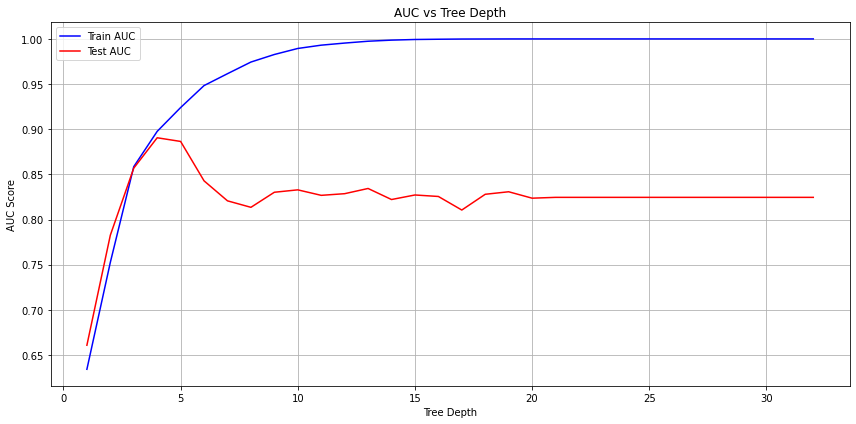

In [27]:
# identify the optimal tree depth for given data
max_depths = list(range(1, 33))
train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth=max_depth, random_state=42)
    dt.fit(X_train_encoded, y_train)

    # predict probabilities
    train_probs = dt.predict_proba(X_train_encoded)[:, 1]
    test_probs = dt.predict_proba(X_test_encoded)[:, 1]

    # calculate AUC scores
    train_auc = roc_auc_score(y_train, train_probs)
    test_auc = roc_auc_score(y_test, test_probs)

    train_results.append(train_auc)
    test_results.append(test_auc)

# plotting
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.xlabel('Tree Depth')
plt.ylabel('AUC Score')
plt.title('AUC vs Tree Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The training error decreases as the tree depth increases, even reaching a value of 1, which would be a clear sign of overfitting. The error seems lowest at a depth of around 4 and 5, before seeing a significant increase.The optimal value we have identified is **5**.

#### Min samples splits
The minimum number of samples needed to split a node.

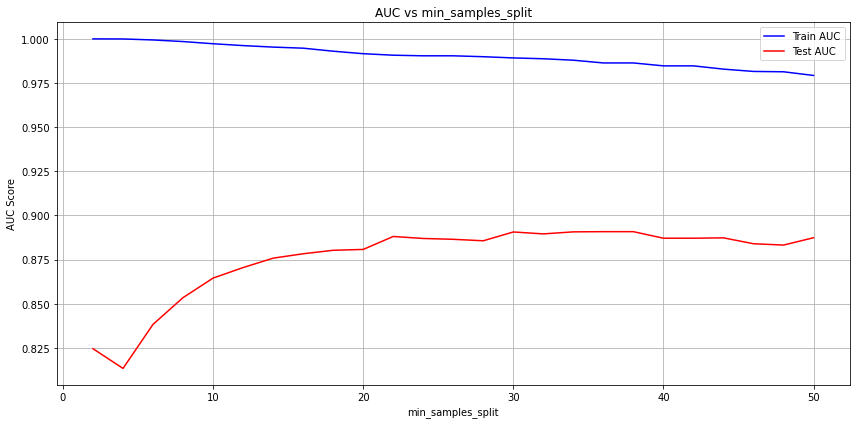

In [28]:
min_samples_splits = range(2, 51, 2)
train_results = []
test_results = []

for split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', min_samples_split=split, random_state=42)
    dt.fit(X_train_encoded, y_train)
    
    train_probs = dt.predict_proba(X_train_encoded)[:, 1]
    test_probs = dt.predict_proba(X_test_encoded)[:, 1]
    
    train_results.append(roc_auc_score(y_train, train_probs))
    test_results.append(roc_auc_score(y_test, test_probs))

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('min_samples_split')
plt.ylabel('AUC Score')
plt.title('AUC vs min_samples_split')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

When the mininum sample splits are low the training error is exceptionally low (overfitting). On the otherhand, the testing error starts off high but gradually decreases as the minimum sample split increases. This increases steadies of at a split of around **20** making it the optimal value.

#### Min sample leafs
The minimum number of samples required in a leaf.

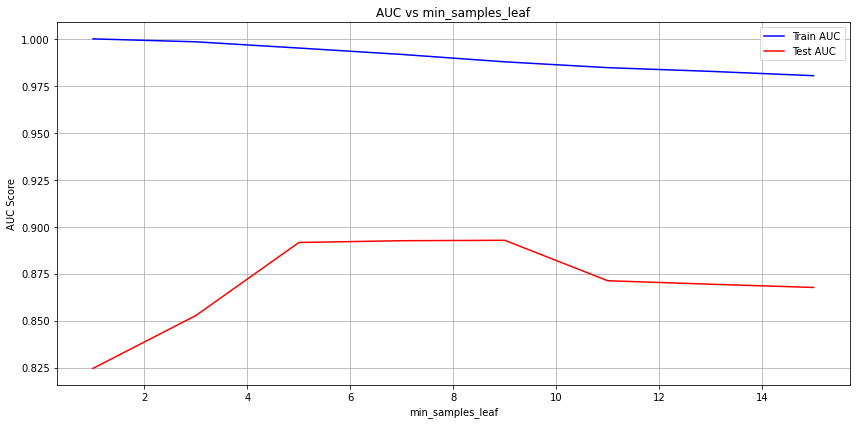

In [29]:
min_samples_leafs = range(1, 16, 2)
train_results = []
test_results = []

for leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', min_samples_leaf=leaf, random_state=42)
    dt.fit(X_train_encoded, y_train)
    
    train_probs = dt.predict_proba(X_train_encoded)[:, 1]
    test_probs = dt.predict_proba(X_test_encoded)[:, 1]
    
    train_results.append(roc_auc_score(y_train, train_probs))
    test_results.append(roc_auc_score(y_test, test_probs))

plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC Score')
plt.title('AUC vs min_samples_leaf')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Similar to minimum sample splits,  the training error starts of at 0 (overfitting) but increases as the size of sample leafs increases. Furthermore, the testing error decreases as the sample leafs increases but this steadies off at a value of **5**, highlighting it as optimal

#### Input values into model

In [30]:
# tune the model hyperparameters using the information above
dt_tuned = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf= 5,
    class_weight='balanced',
    random_state=42
)

# fit the model
dt_tuned.fit(X_train_encoded, y_train)

# evaluate the model
evaluate_model(dt_tuned, X_train_encoded, X_test_encoded, y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       857
           1       0.79      0.83      0.81       143

    accuracy                           0.94      1000
   macro avg       0.88      0.89      0.89      1000
weighted avg       0.94      0.94      0.94      1000

AUC Score: 0.9094540232229847

train accuracy:  0.9425632233176168
test accuracy:  0.943


**Evaluation**  
The tuned decision tree produced the highest recall for churned customers at **0.83** — a critical achievement given the project's goal of proactively identifying and retaining at-risk customers. The overfitting observed in the baseline decision tree has been successfully mitigated, with training and testing accuracy nearly identical, indicating improved generalisation. Additionally, this model achieved the highest AUC score across all iterations, demonstrating superior ability to distinguish between churners and non-churners. These results make it a strong candidate for deployment.

## Final model
After evaluating several models, I selected the tuned Decision Tree classifier with class balancing and optimized hyperparameters as the final model. The decision was influenced by various performance metrics, the nature of the business problem and the context of the dataset. The tuned Decision Tree addressed this by significantly improving recall and F1-score for the churners, without sacrificing accurac.

The baseline (logistic regression) offered good overall accuracy but poor recall on churners. This suggested it struggled to correctly identify churners, which is a major issue when trying to address customer retention. The tuned Decision Tree addressed this by significantly improving recall and F1-score for the churners, without sacrificing accuracy.  
The final model achieved an **accuracy of 94.3%**, but more importantly, it produced a **recall of 83%** and an **F1-score of 81% for churners**. These values indicate that the model is able to identify a large portion of customers at risk of churning whilst balancing precision to avoid false positives. The model’s **AUC score of 0.91** further confirmed its ability to distinguish between churners and non-churners across all thresholds — a critical factor given the class imbalance observed during EDA. Furthermore, the hyperparameters and class balancing performed on the decision tree classifier avoid the likely overfitting of the default parameter decision tree classifier.

The choice of a Decision Tree model is also justified by its interpretability, which is important for corporate support and real-world deployment. The logic behind a workings of a decision tree are easy to understand/explain. With further investigation into the features used in the model, various departments/teams can leverage that knowledge to devise targeted customer retention schemes. Overall, the tuned Decision Tree classifier performed well from a metrics standpoint whilst remaining very appropriate to the business context.

## Conclusion

### Limitations
From a dataset perspective, other factors that could influence churn (i.e. customer age, competitor pricing) could make it a more robust analyis/model. The utility of the model is limited by the limited range of data used. Furthermore, the dataset is very imbalanced regarding the churn classes. Whilst this was addressed by class balancing, it's possible the imbalance still influenced the results of the model.

When looking at the model, decision tree classifiers are prone to overfitting, even after class balancing and tuning hyperparameters. The models are naturally susceptible to noise, so it's real world performance isn't assured to be as strong as on the test data.

There are also various other classifications models that theoretically could perform better, such as CART regression, but couldn't be tested due to time constraints.

### Recommendations
Future models can use other approaches to data preprocessing to see its impact on model performance. This includes feature engineering columns such as 'total calls' or 'total minutes' to substitute more segmented columns like 'total evening calls'. Additionally, the approach to splitting train and test data could be also be explored further. This could be using a different proportion of test size or using cross validation instead.

To tackle to class imbalance issue, techniques such as SMOTE (Synthetic Minority Over-sampling Technique) could be a powerful tool to explore. Additionally, as the dataset grows, undersampling of non-churners could become a viable possibility.

### Next steps
The next step would be to test this model on real-world/real-time data to evaluate its performance. If successful, this model can be used to intervene in situations where customer churn is increasing in likelihood. The model would need to constantly monitored over time to keep up with industry and behaviorable trends.
Additionally, the model can be used and monitored and testing different forms of customer retention schemes to see how they actually impact churn prevention.